# Import and Data

In [43]:
import torch
import torch.nn as nn
import numpy as np
from tqdm import tqdm
import multiprocessing
from torchvision import datasets
from torchvision.transforms import transforms
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))  
])

In [3]:
train_data = datasets.MNIST(root="data", train=True, download=True, transform=transform)
test_data = datasets.MNIST(root="data", train=False, download=True, transform=transform)

# Split Data

In [4]:
batch_size = 64
num_workers = multiprocessing.cpu_count()
num_workers

12

In [5]:
train_len = int(len(train_data) * 0.8)
val_len = int(len(train_data)) - train_len

In [6]:
train_subset, val_subset = torch.utils.data.random_split(
    train_data, [train_len, val_len], generator=torch.Generator().manual_seed(42)
)

In [7]:
train_loader = torch.utils.data.DataLoader(
    train_subset, batch_size=batch_size, shuffle=True, num_workers=num_workers
)
val_loader = torch.utils.data.DataLoader(
    val_subset, batch_size=batch_size, shuffle=False, num_workers=num_workers
)
test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size, num_workers=num_workers
)

# Visualize the data

In [8]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()

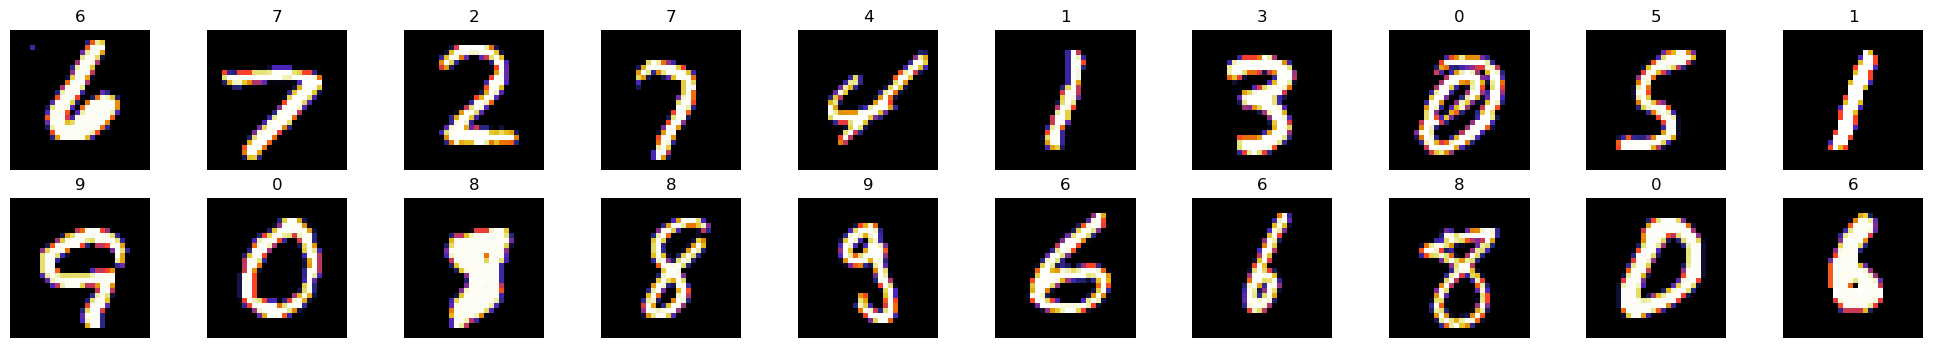

In [9]:
fig, subs = plt.subplots(2, 10, figsize=(25, 4))
for idx, sub in zip(np.arange(20), subs.flatten()):
    sub.imshow(np.squeeze(images[idx]), cmap="CMRmap")
    sub.set_title(str(labels[idx].item()))
    sub.axis("off")

# View an image in more detail

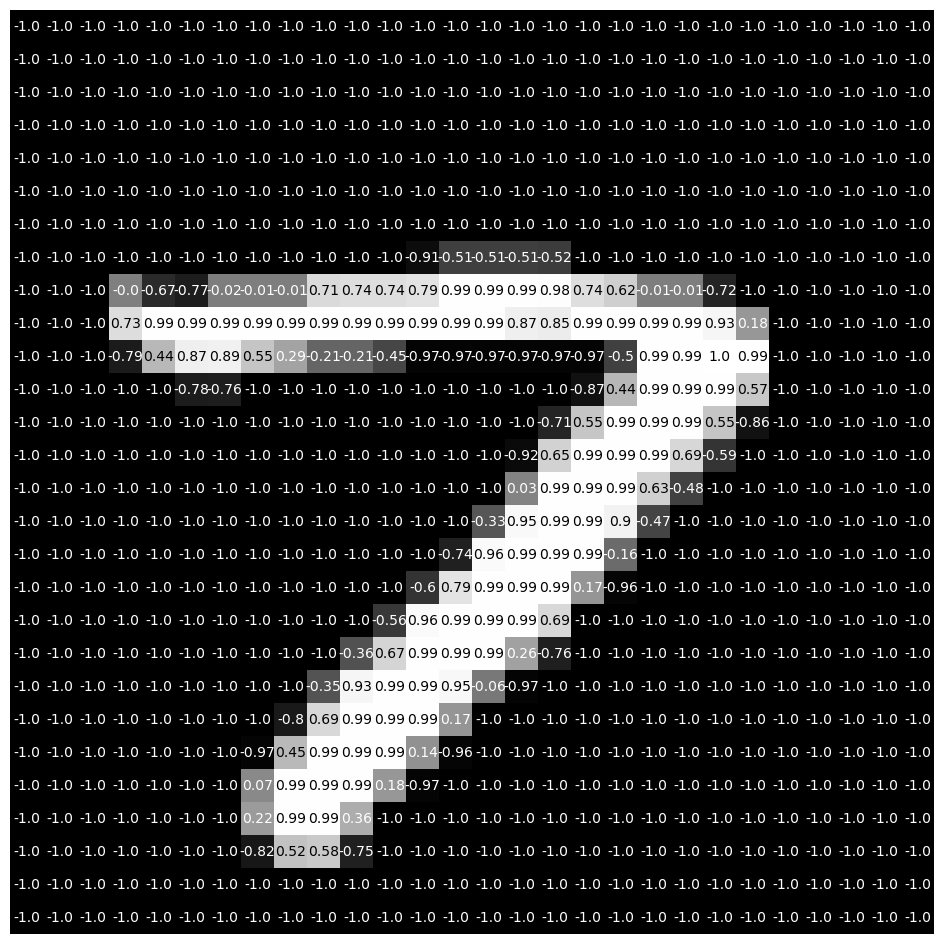

In [42]:
img = np.squeeze(images[1])
fig, sub = plt.subplots(figsize=(12, 12))
sub.imshow(img, cmap="gray")
width, height = img.shape
thresh = img.max() / 2.5
for i in range(width):
    for j in range(height):
        val = round(img[i][j], 2) if img[i][j] != 0 else 0
        sub.annotate(
            str(val),
            xy=(j, i),
            horizontalalignment="center",
            verticalalignment="center",
            color= "white" if img[i][j] < thresh else "black"
        )
        sub.axis("off")

# Defining the Network Architecture

In [46]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        hidden1 = 512
        hidden2 = 512
        dropout = 0.3
        
        self.model = nn.Sequential(
            nn.Linear(28 * 28, hidden1),
            nn.ReLU(),
            nn.Dropout(dropout),
            
            nn.Linear(hidden1, hidden2),
            nn.ReLU(),
            nn.Dropout(dropout),
            
            nn.Linear(hidden2, 10)
        )
        
    def forward(self, x):
        x = x.view(-1, 28 * 28) # Flatten input image
        return self.model(x)

In [48]:
model = Net()
model

Net(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=512, out_features=512, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [49]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=0.001)

# Training and Validating the Network

In [ ]:
n_epochs = 50
model.train()

for epoch in range(n_epochs):
    
    ####################
    # Training Process #
    ####################
    training_loss = 0.0
    
    for batch_idx, (inputs, targets) in tqdm(
        iterable=enumerate(train_loader),
        desc="training",
        total=len(train_loader),
        leave=True,
        ncols=80
    ):
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        
        optimizer.step()
        
        training_loss += inputs.size(0) * loss.item()
        
    train_loss = training_loss / len(train_loader.dataset)
    
    with torch.no_grad():
        ######################
        # Validation Process #
        ######################
        
        model.eval()
        valid_loss = 0.0
        
        for batch_idx, (inputs, targets) in tqdm(
            enumerate(val_loader),
            desc="validation",
            leave=True,
            total=len(val_loader),
            ncols=80
        ):

            outputs = model(inputs)
            loss_value = criterion(outputs, targets)
            
            valid_loss += (1 / (batch_idx + 1)) * (loss_value.item() - valid_loss)
            
    print(f"Epoch: {epoch + 1}, Training Loss: {train_loss:.5f}, Validation Loss: {valid_loss:.5f}")    

validation: 100%|█████████████████████████████| 188/188 [00:38<00:00,  4.93it/s]


Epoch: 1, Training Loss: 0.46156, Validation Loss: 0.36247


validation: 100%|█████████████████████████████| 188/188 [00:22<00:00,  8.18it/s]


Epoch: 2, Training Loss: 0.31848, Validation Loss: 0.31482


validation: 100%|█████████████████████████████| 188/188 [00:30<00:00,  6.10it/s]


Epoch: 3, Training Loss: 0.28223, Validation Loss: 0.29009


validation: 100%|█████████████████████████████| 188/188 [00:23<00:00,  7.84it/s]


Epoch: 4, Training Loss: 0.25585, Validation Loss: 0.26793


validation: 100%|█████████████████████████████| 188/188 [00:22<00:00,  8.35it/s]


Epoch: 5, Training Loss: 0.23361, Validation Loss: 0.24348


validation: 100%|█████████████████████████████| 188/188 [00:22<00:00,  8.49it/s]


Epoch: 6, Training Loss: 0.21432, Validation Loss: 0.22962


validation: 100%|█████████████████████████████| 188/188 [00:22<00:00,  8.34it/s]


Epoch: 7, Training Loss: 0.19698, Validation Loss: 0.21732


validation: 100%|█████████████████████████████| 188/188 [00:23<00:00,  8.01it/s]


Epoch: 8, Training Loss: 0.18240, Validation Loss: 0.21582


validation: 100%|█████████████████████████████| 188/188 [00:23<00:00,  8.07it/s]


Epoch: 9, Training Loss: 0.16905, Validation Loss: 0.18756


validation: 100%|█████████████████████████████| 188/188 [00:22<00:00,  8.24it/s]


Epoch: 10, Training Loss: 0.15785, Validation Loss: 0.18301


validation: 100%|█████████████████████████████| 188/188 [00:22<00:00,  8.22it/s]


Epoch: 11, Training Loss: 0.14743, Validation Loss: 0.17108


validation: 100%|█████████████████████████████| 188/188 [00:22<00:00,  8.24it/s]


Epoch: 12, Training Loss: 0.13882, Validation Loss: 0.16350


validation: 100%|█████████████████████████████| 188/188 [00:22<00:00,  8.22it/s]


Epoch: 13, Training Loss: 0.13051, Validation Loss: 0.15488


validation: 100%|█████████████████████████████| 188/188 [00:26<00:00,  7.11it/s]


Epoch: 14, Training Loss: 0.12302, Validation Loss: 0.14981


validation: 100%|█████████████████████████████| 188/188 [00:23<00:00,  8.03it/s]


Epoch: 15, Training Loss: 0.11669, Validation Loss: 0.14610


validation: 100%|█████████████████████████████| 188/188 [00:22<00:00,  8.35it/s]


Epoch: 16, Training Loss: 0.11113, Validation Loss: 0.13852


validation: 100%|█████████████████████████████| 188/188 [00:22<00:00,  8.41it/s]


Epoch: 17, Training Loss: 0.10577, Validation Loss: 0.13586


validation: 100%|█████████████████████████████| 188/188 [00:22<00:00,  8.44it/s]


Epoch: 18, Training Loss: 0.10072, Validation Loss: 0.13075


validation: 100%|█████████████████████████████| 188/188 [00:22<00:00,  8.40it/s]


Epoch: 19, Training Loss: 0.09612, Validation Loss: 0.12743


validation: 100%|█████████████████████████████| 188/188 [00:22<00:00,  8.47it/s]


Epoch: 20, Training Loss: 0.09183, Validation Loss: 0.12461


validation: 100%|█████████████████████████████| 188/188 [00:22<00:00,  8.33it/s]


Epoch: 21, Training Loss: 0.08797, Validation Loss: 0.12185


validation: 100%|█████████████████████████████| 188/188 [00:22<00:00,  8.43it/s]


Epoch: 22, Training Loss: 0.08456, Validation Loss: 0.12140


validation: 100%|█████████████████████████████| 188/188 [00:22<00:00,  8.49it/s]


Epoch: 23, Training Loss: 0.08095, Validation Loss: 0.12099


validation: 100%|█████████████████████████████| 188/188 [00:22<00:00,  8.33it/s]


Epoch: 24, Training Loss: 0.07817, Validation Loss: 0.11108


validation: 100%|█████████████████████████████| 188/188 [00:22<00:00,  8.28it/s]


Epoch: 25, Training Loss: 0.07498, Validation Loss: 0.10938


validation: 100%|█████████████████████████████| 188/188 [00:22<00:00,  8.22it/s]


Epoch: 26, Training Loss: 0.07244, Validation Loss: 0.10868


validation: 100%|█████████████████████████████| 188/188 [00:22<00:00,  8.36it/s]


Epoch: 27, Training Loss: 0.07004, Validation Loss: 0.10700


validation: 100%|█████████████████████████████| 188/188 [00:22<00:00,  8.20it/s]


Epoch: 28, Training Loss: 0.06729, Validation Loss: 0.11046


validation: 100%|█████████████████████████████| 188/188 [00:22<00:00,  8.29it/s]


Epoch: 29, Training Loss: 0.06513, Validation Loss: 0.10234


validation: 100%|█████████████████████████████| 188/188 [00:22<00:00,  8.29it/s]


Epoch: 30, Training Loss: 0.06312, Validation Loss: 0.10233


validation: 100%|█████████████████████████████| 188/188 [00:22<00:00,  8.27it/s]


Epoch: 31, Training Loss: 0.06114, Validation Loss: 0.10061


validation: 100%|█████████████████████████████| 188/188 [00:22<00:00,  8.26it/s]


Epoch: 32, Training Loss: 0.05922, Validation Loss: 0.10156


validation: 100%|█████████████████████████████| 188/188 [00:22<00:00,  8.26it/s]


Epoch: 33, Training Loss: 0.05732, Validation Loss: 0.09689


validation: 100%|█████████████████████████████| 188/188 [00:26<00:00,  7.15it/s]


Epoch: 34, Training Loss: 0.05556, Validation Loss: 0.10038


validation: 100%|█████████████████████████████| 188/188 [00:24<00:00,  7.61it/s]


Epoch: 35, Training Loss: 0.05376, Validation Loss: 0.09430


validation: 100%|█████████████████████████████| 188/188 [00:23<00:00,  8.11it/s]


Epoch: 36, Training Loss: 0.05243, Validation Loss: 0.09440


validation: 100%|█████████████████████████████| 188/188 [00:25<00:00,  7.29it/s]


Epoch: 37, Training Loss: 0.05075, Validation Loss: 0.09724


validation: 100%|█████████████████████████████| 188/188 [00:25<00:00,  7.44it/s]


Epoch: 38, Training Loss: 0.04957, Validation Loss: 0.09341


validation: 100%|█████████████████████████████| 188/188 [00:27<00:00,  6.90it/s]


Epoch: 39, Training Loss: 0.04801, Validation Loss: 0.09050


validation: 100%|█████████████████████████████| 188/188 [00:29<00:00,  6.41it/s]


Epoch: 40, Training Loss: 0.04682, Validation Loss: 0.09544


validation: 100%|█████████████████████████████| 188/188 [00:28<00:00,  6.59it/s]


Epoch: 41, Training Loss: 0.04587, Validation Loss: 0.08924


validation: 100%|█████████████████████████████| 188/188 [00:29<00:00,  6.35it/s]


Epoch: 42, Training Loss: 0.04446, Validation Loss: 0.09377


validation: 100%|█████████████████████████████| 188/188 [00:28<00:00,  6.50it/s]


Epoch: 43, Training Loss: 0.04345, Validation Loss: 0.08890


validation: 100%|█████████████████████████████| 188/188 [00:28<00:00,  6.55it/s]


Epoch: 44, Training Loss: 0.04244, Validation Loss: 0.09077


validation: 100%|█████████████████████████████| 188/188 [00:30<00:00,  6.20it/s]


Epoch: 45, Training Loss: 0.04142, Validation Loss: 0.08806


validation: 100%|█████████████████████████████| 188/188 [00:29<00:00,  6.37it/s]


Epoch: 46, Training Loss: 0.04079, Validation Loss: 0.08695


# Test the Trained Network

In [ ]:
test_loss = 0.0
class_correct = list(0.0 for i in range(10))
class_total = list(0.0 for i in range(10))

model.eval()
for batch_idx, (inputs, targets) in tqdm(
    enumerate(test_loader),
    desc="Testing",
    total=len(test_loader)
    leave=True,
    ncols=80
):
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    test_loss += inputs.size(0) * loss.item()
    
    _, pred = torch.max(outputs, 1)
    correct = np.squeeze(pred.eq(tragets.data.view_as(pred)))
    
    for i in range(inputs.shape[0]):
        label = target.data[i]
        class_correct[lable] += correct[i].item()
        class_total[label] += 1
    
test_loss /= len(test_loader.dataset)
print(f"Test Loss: {test_loss:.6f}\n")


for i in range(10):
    if class_total[i] > 0:
        
    else:

In [ ]:
model.eval()
tt = iter(test_loader)
inpp, tarr = next(tt)
outt = model(inpp)

In [ ]:
losss = criterion(outt, tarr)
torch.max(outt, 1)

In [ ]:
tarr.data.view_as(pred)